In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
matriculas= pd.DataFrame()
turmas= pd.DataFrame()
curso= {'CeT':10320810.0,'Computacao':2000026.0, 'Mecatronica':85437055.0,\
        'Biomedica':85341136.0, 'Ambiental':85322571, 'Materiais':2000027,\
        'Mecanica':2000031,'Petroleo':2071220}
lista_cursos= [10320810]#list(curso.values())
for i in range(2010,2018):
    for j in range(1,3):
        matricula = pd.read_csv("matriculas/matriculas-de-"+str(i)+str(j)+".csv", delimiter=";", error_bad_lines=False)
        turma = pd.read_csv("turmas/turmas-"+str(i)+str(j)+".csv", delimiter=";", error_bad_lines=False)
        matriculas= pd.concat([matriculas, matricula[matricula.id_curso.isin(lista_cursos)]]) #matricula[matricula.id_curso==curso['Computacao']]
        print(i,j)
        turma.id_turma= turma.id_turma.astype(int)
        turmas= pd.concat([turmas, turma[turma.id_turma.isin(matricula['id_turma'].unique())]])

2010 1
2010 2


b'Skipping line 9958: expected 25 fields, saw 26\n'


2011 1
2011 2
2012 1
2012 2
2013 1
2013 2
2014 1
2014 2
2015 1
2015 2
2016 1
2016 2
2017 1
2017 2


In [3]:
matriculas= matriculas[matriculas.descricao!='EXCLUIDA']

In [4]:
#print(matriculas.columns)
cursos= pd.read_csv('cursos-graduacao.csv',delimiter=';')
cursos=cursos[['id_curso','nome']]
#cursos= cursos[(cursos.nome.str.contains('ENGENHARIA'))|(cursos.nome.str.contains('CIÊNCIAS E TECNOLOGIA'))][['id_curso','nome']]
cursos.head(5)

,id_curso,nome
0,2000002,ADMINISTRAÇÃO
1,2000004,ADMINISTRAÇÃO
2,15315770,ADMINISTRAÇÃO PÚBLICA
3,2576632,AGRONOMIA
4,94598200,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS


In [31]:
print("Notas dos discentes nas disciplinas")
mediaPorDisc= pd.DataFrame(matriculas.groupby(['discente','id_turma']).media_final.mean())
mediaPorDisc.reset_index(level=0, inplace=True)
mediaPorDisc.reset_index(level=0, inplace=True)

notasDisc= mediaPorDisc.merge(turmas[['id_turma','nome_ascii']], on='id_turma', how='left').drop_duplicates()
notasDisc= notasDisc.sort_values('media_final',ascending=False)
notasDisc= notasDisc.dropna()

aux= pd.DataFrame(notasDisc.groupby('discente').count()['id_turma'])
aux.reset_index(level=0, inplace=True)
aux.columns= ['discente', 'num_disciplinas']
notasDisc= notasDisc.merge(aux, on='discente')
notasDisc.head(5)

#notasDisc[(notasDisc.nome_ascii=='INTELIGENCIA ARTIFICIAL APLICADA')&(notasDisc.media_final==10)].head(5)

#notasDisc= notasDisc.merge(matriculas[['discente','id_curso']].drop_duplicates(),on='discente')
#notasDisc= notasDisc.merge(cursos,on='id_curso')
#notasDisc= notasDisc.drop('id_curso', axis=1)
#notasDisc.rename(columns={'nome':'curso'}, inplace=True)
#cols= ['curso']
#cols.extend(notasDisc.columns.values[:-1])
#notasDisc[cols].head(5)

# eng
#notasDisc[notasDisc.discente=='7b371d0184685d8c78e6ae6c6f7a8673'].head(15) #eu
#notasDisc[notasDisc.discente=='6f2fd940ca2cb10741518d7c0609a12a'].head(15) #pedro
#notasDisc[notasDisc.discente=='6cc232fd8c50956f6e3459c4e6ce2709'] # andressa
# c&t
#notasDisc[notasDisc.discente=='8032c974c90eae91a881657fc16092f2'] # eu

Notas dos discentes nas disciplinas


,id_turma,discente,media_final,nome_ascii,num_disciplinas
0,1183252,b63682b0778b9a4aef431c5d39873566,10.0,PRINCIPIOS E FENOMENOS ELETROMAGNETICOS,35
1,1163791,b63682b0778b9a4aef431c5d39873566,10.0,INFORMATICA FUNDAMENTAL,35
2,1172384,b63682b0778b9a4aef431c5d39873566,9.8,PRATICAS DE LEITURA E ESCRITA EM INGLES,35
3,1231759,b63682b0778b9a4aef431c5d39873566,9.2,MATEMATICA FINANCEIRA,35
4,1191708,b63682b0778b9a4aef431c5d39873566,9.2,CIENCIA E TECNOLOGIA DOS MATERIAIS,35


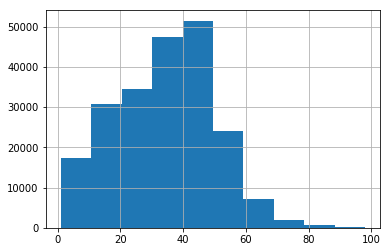

In [33]:
notasDisc.num_disciplinas.hist()

In [6]:
print("Media dos discentes nas disciplinas")
mediaGerealDisc= pd.DataFrame(matriculas.groupby('discente').media_final.mean()).dropna()
mediaGerealDisc.reset_index(level=0,inplace=True)
mediaGerealDisc= mediaGerealDisc.sort_values('media_final',ascending=False)

mediaGerealDisc=mediaGerealDisc.merge(notasDisc,on='discente')[['discente','media_final_x','num_disciplinas']].drop_duplicates()
mediaGerealDisc[mediaGerealDisc.num_disciplinas>30].sort_values('media_final_x',ascending=False).reset_index().head(10)
#mediaGerealDisc=mediaGerealDisc[mediaGerealDisc.num_disciplinas>10].sort_values('media_final_x',ascending=False).head(50)
#mediaGerealDisc=mediaGerealDisc.reset_index()
#mediaGerealDisc.head(80)
#mediaGerealDisc[mediaGerealDisc.discente=='6cc232fd8c50956f6e3459c4e6ce2709']


Media dos discentes nas disciplinas


,index,discente,media_final_x,num_disciplinas
0,3,7adac24628cd45073139123a2c435b14,9.579310,38
1,61,a6e8b7bf03d510bbf2d84b06069d29e5,9.404386,37
2,98,284ea8334758fb18b2172b709c567538,9.385507,42
3,141,f5b9df135a16a2e796e89b80cf00b1d9,9.218519,31
4,172,3bb663d61d92e9c81a6f399c10fdb634,9.203659,31
5,221,1c8653e4b996b0183db8a4326b6a9d39,9.162044,40
6,306,2f7a5034955353810ec057d4ecf46235,9.127835,31
7,348,bd4db9371853b28808e30114ab8c7e9e,9.016239,37
8,398,1647653cfea95c27d78f6069504659d9,8.997479,37
9,435,e58879000b0d3838e49f19ca08c6214f,8.996939,33


In [1]:
print("Medias das disciplinas")
mediaDisc= pd.DataFrame(matriculas.groupby('id_turma').media_final.mean())
mediaDisc.reset_index(level=0,inplace=True)
mediaDisc= mediaDisc.merge(turmas[['id_turma','nome_ascii','ano','periodo']], on='id_turma', how='left')

aux= pd.DataFrame(notasDisc.groupby('id_turma').count()['discente'])
aux.reset_index(level=0, inplace=True)
aux.columns= ['id_turma','num_discentes']
mediaDisc=mediaDisc.merge(aux,on='id_turma')

mediaDisc= mediaDisc[mediaDisc.num_discentes>30].sort_values('media_final',ascending=False).drop_duplicates()
mediaDisc.head(10)

Medias das disciplinas


NameError: name 'pd' is not defined

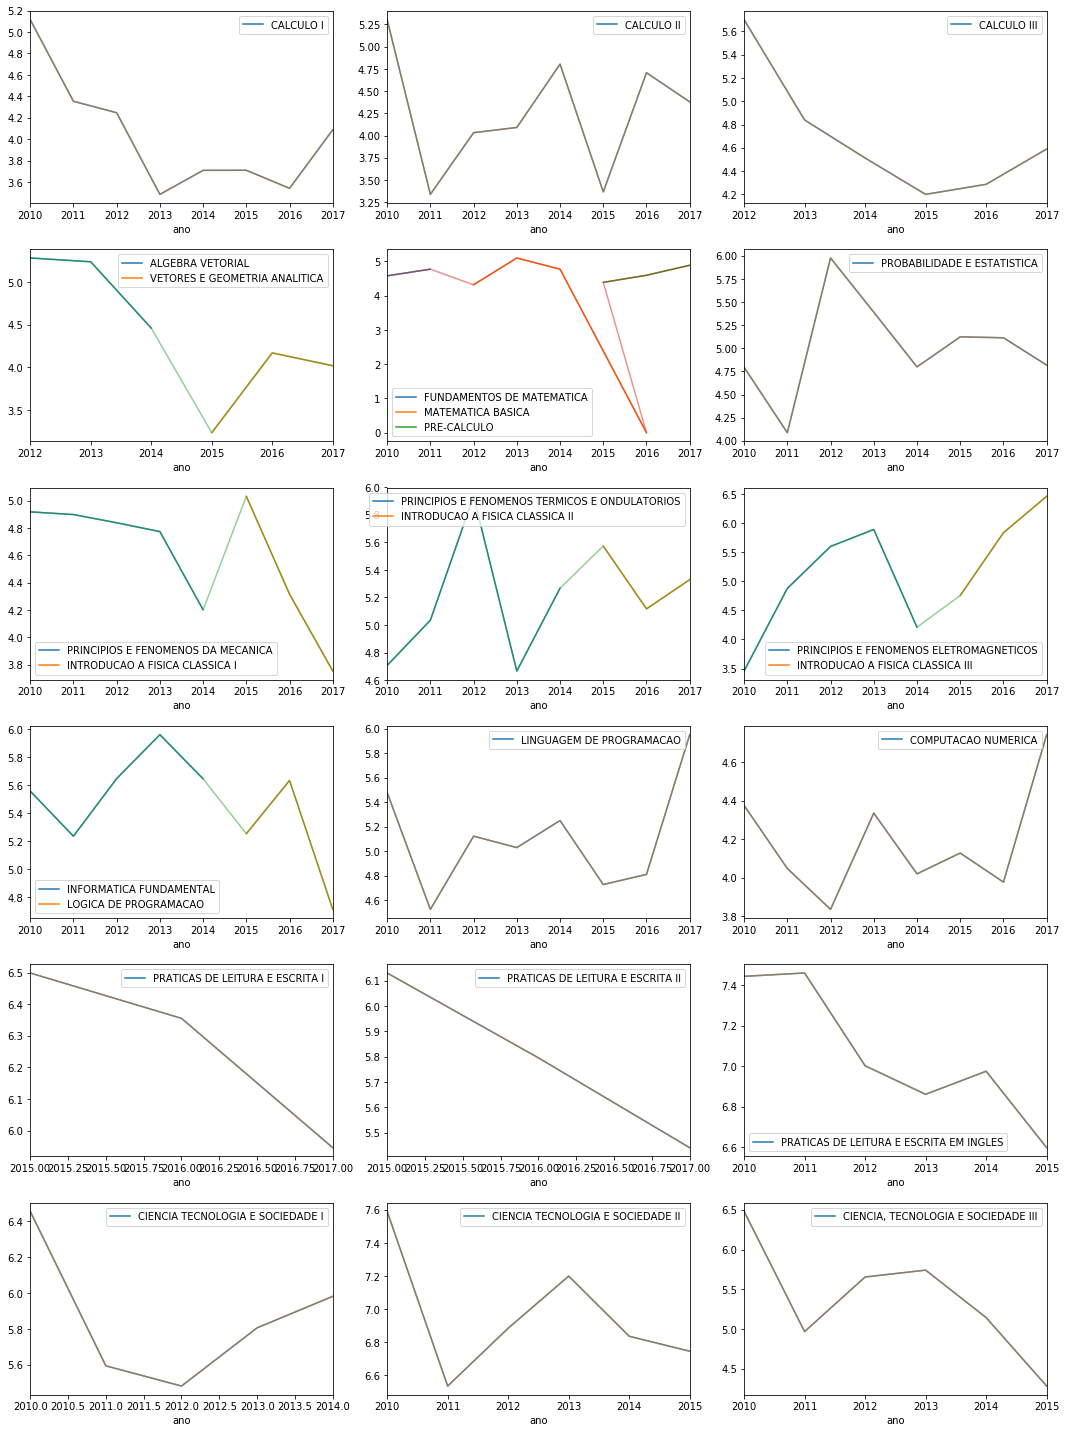

In [8]:
x=notasDisc.merge(turmas[['id_turma','ano','periodo']],on='id_turma')
x=x.merge(matriculas[['discente','id_turma','descricao']].drop_duplicates(),on=['discente','id_turma']).drop_duplicates()
x=x[x.descricao.isin(['APROVADO','APROVADO POR NOTA','REPROVADO','REPROVADO POR NOTA'])]

disciplinas= [['CALCULO I'], ['CALCULO II'], ['CALCULO III'],
              ['ALGEBRA VETORIAL','VETORES E GEOMETRIA ANALITICA'],
              ['FUNDAMENTOS DE MATEMATICA','MATEMATICA BASICA','PRE-CALCULO'], ['PROBABILIDADE E ESTATISTICA'],
              ['PRINCIPIOS E FENOMENOS DA MECANICA','INTRODUCAO A FISICA CLASSICA I'],
              ['PRINCIPIOS E FENOMENOS TERMICOS E ONDULATORIOS', 'INTRODUCAO A FISICA CLASSICA II'],
              ['PRINCIPIOS E FENOMENOS ELETROMAGNETICOS', 'INTRODUCAO A FISICA CLASSICA III'],
              ['INFORMATICA FUNDAMENTAL', 'LOGICA DE PROGRAMACAO'],
              ['LINGUAGEM DE PROGRAMACAO'], ['COMPUTACAO NUMERICA'],\
              ['PRATICAS DE LEITURA E ESCRITA I'], ['PRATICAS DE LEITURA E ESCRITA II'],\
              ['PRATICAS DE LEITURA E ESCRITA EM INGLES'], ['CIENCIA TECNOLOGIA E SOCIEDADE I'],\
              ['CIENCIA TECNOLOGIA E SOCIEDADE II'],['CIENCIA, TECNOLOGIA E SOCIEDADE III']
             ]
cont= 1
plt.ion()
fig= plt.figure(figsize=(15,20))
for d in disciplinas:
    fig.add_subplot(6,3,cont)
    cont+=1
    lx= []
    ly= []
    for r in d:
        a=x[x.nome_ascii==r].groupby('ano').media_final.mean()
        ly.extend(a.values)
        lx.extend(list(a.keys()))
        a.plot(label=r)
        plt.legend()
    plt.plot(lx,ly, alpha=0.5)
plt.tight_layout()
plt.savefig('notas.png')
plt.show()

In [203]:
#turmas[turmas.nome_ascii.str.contains('QUIMICA T')]

In [9]:
g= pd.crosstab(notasDisc.discente,notasDisc.nome_ascii,notasDisc.media_final,aggfunc=np.mean)
g=g.reset_index()

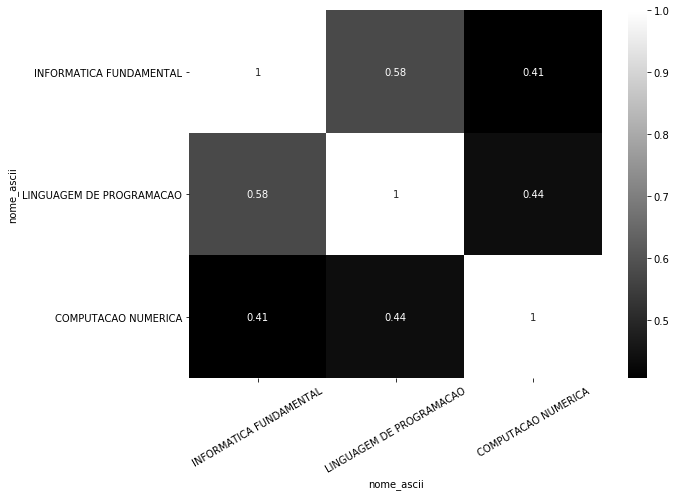

In [30]:
#mat= ['FUNDAMENTOS DE MATEMATICA','PRE-CALCULO','MATEMATICA BASICA','CALCULO I', 'CALCULO II', 'CALCULO III',\
#     'ALGEBRA VETORIAL','VETORES E GEOMETRIA ANALITICA', 'PROBABILIDADE E ESTATISTICA', 'QUIMICA GERAL',\
#      'QUIMICA TECNOLOGICA']
mat= ['MATEMATICA BASICA', 'ALGEBRA VETORIAL', 'ALGEBRA LINEAR','CALCULO I', 'CALCULO II', 'CALCULO III',\
    'PROBABILIDADE E ESTATISTICA']
mat2= ['PRE-CALCULO', 'VETORES E GEOMETRIA ANALITICA', 'ALGEBRA LINEAR','CALCULO I', 'CALCULO II', 'CALCULO III',\
    'PROBABILIDADE E ESTATISTICA']

comp= ['INFORMATICA FUNDAMENTAL', 'LINGUAGEM DE PROGRAMACAO', 'COMPUTACAO NUMERICA']
comp2= ['LOGICA DE PROGRAMACAO', 'LINGUAGEM DE PROGRAMACAO', 'COMPUTACAO NUMERICA']

quim= ['QUIMICA TECNOLOGICA', 'CIENCIA E TECNOLOGIA DOS MATERIAIS']

hum= ['PRATICA DE LEITURA E ESCRITA', 'PRATICAS DE LEITURA E ESCRITA II',\
      'PRATICAS DE LEITURA E ESCRITA EM INGLES',\
     'CIENCIA TECNOLOGIA E SOCIEDADE I', 'CIENCIA TECNOLOGIA E SOCIEDADE II','CIENCIA, TECNOLOGIA E SOCIEDADE III']

heat= pd.DataFrame(g[comp].corr())
fig, ax = plt.subplots(figsize=(10,7)) 
sns_plot = sns.heatmap(heat, cmap='gray',annot=True, ax=ax)
plt.xticks(rotation=30)
plt.tight_layout()
sns_plot.get_figure().savefig('comp.png')
#g[mat].corr()
#g[comp].corr()
#g[hum].corr()
#pd.scatter_matrix(g[mat],figsize=(20,20))
#plt.savefig('foo.png')

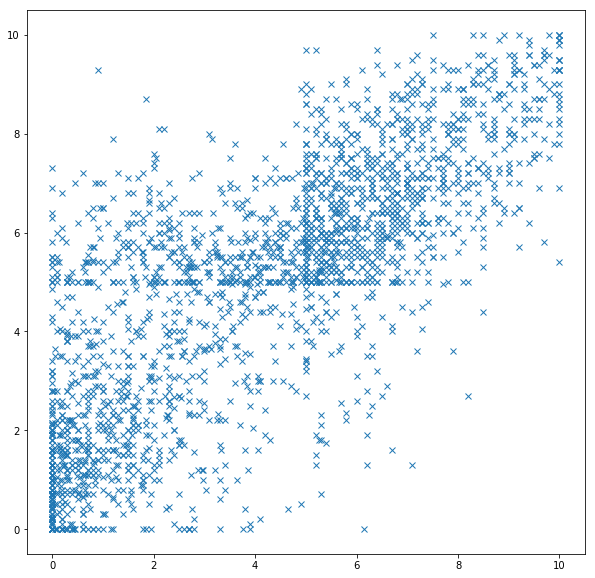

In [11]:
a= g[['VETORES E GEOMETRIA ANALITICA','QUIMICA GERAL']].dropna()['VETORES E GEOMETRIA ANALITICA']
b= g[['VETORES E GEOMETRIA ANALITICA','QUIMICA GERAL']].dropna()['QUIMICA GERAL']
plt.figure(figsize=(10,10))
plt.plot(a,b,'x')

In [13]:
x=notasDisc.merge(matriculas[['discente','id_turma','descricao']].drop_duplicates(),on=['discente','id_turma']).drop_duplicates()
x=pd.crosstab(x.id_turma,x.descricao)
x=x.reset_index()
x=x.merge(turmas[['id_turma','nome_ascii','ano','periodo']],on='id_turma')
x=x[['id_turma','nome_ascii','ano','periodo','APROVADO','APROVADO POR NOTA','REPROVADO','TRANCADO']]
x['TOTAL']= x[['APROVADO','APROVADO POR NOTA','REPROVADO','TRANCADO']].sum(axis=1)
x['taxa_aprovacao']= (x['APROVADO']+x['APROVADO POR NOTA'])/x['TOTAL']
x=x.drop_duplicates()
x[x.TOTAL>50].sort_values('REPROVADO',ascending=False).head(10)

,id_turma,nome_ascii,ano,periodo,APROVADO,APROVADO POR NOTA,REPROVADO,TRANCADO,TOTAL,taxa_aprovacao
2464,1197743,CALCULO I,2013,1,9,0,101,0,110,0.081818
2047,1191231,CALCULO I,2012,2,44,0,100,0,144,0.305556
2463,1197716,CALCULO I,2013,1,26,0,91,0,117,0.222222
1496,1183159,CALCULO II,2012,1,15,0,88,0,103,0.145631
3045,1208117,CALCULO I,2013,2,19,0,87,0,106,0.179245
2734,1200178,MECANICA DOS SOLIDOS,2013,1,40,0,83,0,123,0.325203
8230,57586058,INTRODUCAO A FISICA CLASSICA I,2016,2,8,18,81,0,107,0.242991
8094,57585724,CALCULO I,2016,2,11,27,81,0,119,0.319328
8090,57585709,CALCULO I,2016,2,9,16,80,0,105,0.238095
3908,1220146,CALCULO I,2014,1,15,7,80,0,102,0.215686


In [277]:
x=notasDisc.merge(matriculas[['discente','id_turma','descricao']].drop_duplicates(),on=['discente','id_turma']).drop_duplicates()
x=pd.crosstab(x.id_turma,x.descricao)
x=x.reset_index()
x=x.merge(turmas[['id_turma','nome_ascii','ano','periodo']],on='id_turma').drop_duplicates()
cols= list(x.columns[-3:])
cols.extend(x.columns[:-3])
x=x[cols]
x['TOTAL']= x[['APROVADO','APROVADO POR NOTA','REPROVADO','TRANCADO',\
               'REPROVADO POR FALTAS','REPROVADO POR MÉDIA E POR FALTAS',\
               'REPROVADO POR NOTA','REPROVADO POR NOTA E FALTA']].sum(axis=1)
x['CURSARAM']= x[['APROVADO','APROVADO POR NOTA','REPROVADO','REPROVADO POR NOTA']].sum(axis=1)
#d['taxa_aprovacao']= (x['APROVADO']+x['APROVADO POR NOTA'])/x['total']
x['taxa_aprovacao']= (x['APROVADO']+x['APROVADO POR NOTA'])/(x['CURSARAM'])
x['taxa_desistencia']= (x['TRANCADO']+x['REPROVADO POR MÉDIA E POR FALTAS']+\
                       x['REPROVADO POR FALTAS']+x['REPROVADO POR NOTA E FALTA'])/(x['TOTAL'])
#x=x.drop_duplicates()

In [15]:
x[x.TOTAL>100].sort_values('REPROVADO',ascending=False).head(5)
#x[x.TOTAL>100].sort_values('taxa_desistencia',ascending=False).head(5)

,nome_ascii,ano,periodo,id_turma,APROVADO,APROVADO POR NOTA,CANCELADO,DESISTENCIA,EM ESPERA,INDEFERIDO,...,REPROVADO,REPROVADO POR FALTAS,REPROVADO POR MÉDIA E POR FALTAS,REPROVADO POR NOTA,REPROVADO POR NOTA E FALTA,TRANCADO,TOTAL,CURSARAM,taxa_aprovacao,taxa_desistencia
2464,CALCULO I,2013,1,1197743,9,0,14,0,0,1,...,101,0,0,0,0,0,110,110,0.081818,0.0
2047,CALCULO I,2012,2,1191231,44,0,7,0,0,29,...,100,0,0,0,0,0,144,144,0.305556,0.0
2463,CALCULO I,2013,1,1197716,26,0,10,0,0,1,...,91,0,0,0,0,0,117,117,0.222222,0.0
1496,CALCULO II,2012,1,1183159,15,0,14,0,0,1,...,88,0,0,0,0,0,103,103,0.145631,0.0
3045,CALCULO I,2013,2,1208117,19,0,6,0,0,3,...,87,0,0,0,0,0,106,106,0.179245,0.0


In [101]:
m1=y[y.TOTAL>100].groupby('ano').taxa_aprovacao.nsmallest(5).reset_index()
m1=m1.merge(y[['nome_ascii','ano','taxa_aprovacao']],on=['ano','taxa_aprovacao'])
m1[m1.ano==2010]

m2=y[y.TOTAL>100].groupby('ano').taxa_desistencia.nlargest(5).reset_index()
m2=m2.merge(y[['nome_ascii','ano','taxa_desistencia']],on=['ano','taxa_desistencia'])
m2[m2.ano==2010]

,ano,level_1,taxa_desistencia,nome_ascii
0,2010,325,0.135831,"CIENCIA, TECNOLOGIA E SOCIEDADE III"
1,2010,278,0.110924,CALCULO II
2,2010,2303,0.094637,QUIMICA TECNOLOGICA
3,2010,22,0.092385,ALGEBRA LINEAR
4,2010,970,0.083784,FUNDAMENTOS DE MATEMATICA


In [104]:
h1=pd.crosstab(y.nome_ascii,y.ano,y.taxa_aprovacao,aggfunc=np.sum).reset_index()
h1[h1.nome_ascii=='CALCULO I']
h2=pd.crosstab(y.nome_ascii,y.ano,y.taxa_desistencia,aggfunc=np.sum).reset_index()
h2[h2.nome_ascii=='CALCULO I']

ano,nome_ascii,2010,2011,2012,2013,2014,2015,2016,2017
99,CALCULO I,0.0311,0.024031,0.005342,0.069111,0.089364,0.22971,0.11423,0.389877


In [280]:
y= x.groupby('nome_ascii').sum()
y=y.reset_index()
y=y.drop(['id_turma','ano','periodo'],axis=1)
y['taxa_aprovacao']= (y['APROVADO']+y['APROVADO POR NOTA'])/(y['CURSARAM'])
y['taxa_desistencia']= (y['TRANCADO']+y['REPROVADO POR MÉDIA E POR FALTAS']+\
                       y['REPROVADO POR FALTAS']+y['REPROVADO POR NOTA E FALTA'])/(y['TOTAL'])
y=y.drop_duplicates()
y[y.TOTAL>=200][['nome_ascii','taxa_aprovacao']].sort_values('taxa_aprovacao',ascending=True).head(6)
#y[y.TOTAL>100].sort_values('taxa_aprovacao',ascending=True).head(5)
#plt.plot()

,nome_ascii,taxa_aprovacao
979,VETORES E GEOMETRIA ANALITICA,0.435875
99,CALCULO I,0.467727
133,COMPUTACAO NUMERICA,0.511328
101,CALCULO II,0.523207
12,ALGEBRA LINEAR,0.551270
602,MECANICA DOS SOLIDOS,0.557058


In [188]:
w= x.groupby(['nome_ascii','ano']).sum()
w=w.reset_index()
w=w.drop(['id_turma','periodo'],axis=1)
w['taxa_aprovacao']= (w['APROVADO']+w['APROVADO POR NOTA'])/(w['CURSARAM'])
w['taxa_desistencia']= (w['TRANCADO']+w['REPROVADO POR MÉDIA E POR FALTAS']+\
                       w['REPROVADO POR FALTAS']+w['REPROVADO POR NOTA E FALTA'])/(w['TOTAL'])
w=w.drop_duplicates()
#w[w.TOTAL>200].sort_values('taxa_aprovacao',ascending=True).head(6)

In [231]:
v=y[y.TOTAL>=200][['nome_ascii','taxa_aprovacao']].sort_values('taxa_aprovacao',ascending=True).head(12)
v=v.merge(turmas[['nome_ascii','codigo']],on='nome_ascii').drop_duplicates()
v['taxa_aprovacao']*=100
v=v[v.codigo.str.contains('ECT')].drop_duplicates('nome_ascii').head(6)
v

,nome_ascii,taxa_aprovacao,codigo
8,VETORES E GEOMETRIA ANALITICA,43.587470,ECT2102
81,CALCULO I,46.772738,ECT1102
443,COMPUTACAO NUMERICA,51.132759,ECT1303
915,CALCULO II,52.320745,ECT1202
1168,ALGEBRA LINEAR,55.126984,ECT1201
1346,MECANICA DOS SOLIDOS,55.705787,ECT1402


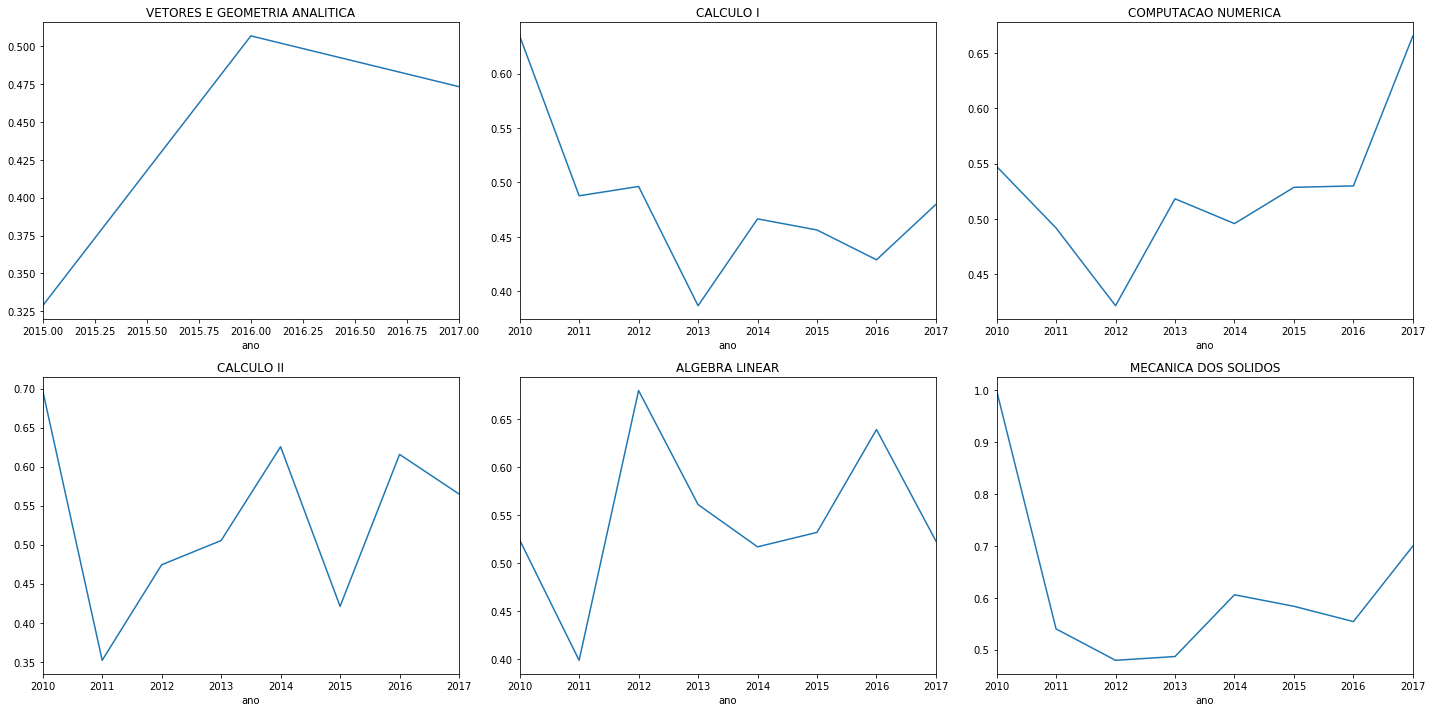

In [201]:
#y.drop(['CANCELADO','INDEFERIDO'],axis=1)
#v= y[y.TOTAL>=200][['nome_ascii','taxa_aprovacao']].sort_values('taxa_aprovacao',ascending=True).head(6)
cont= 1
plt.ion()
fig= plt.figure(figsize=(20,10))
for n in v.nome_ascii:
    fig.add_subplot(2,3,cont)
    cont+=1
    a= w[w.nome_ascii==n]
    a.index= a.ano
    a['taxa_aprovacao'].plot()
    plt.title(n)
plt.tight_layout()
plt.savefig('taxa_apro_ano.png')
#y[y.TOTAL>=100][['nome_ascii','taxa_desistencia']].sort_values('taxa_desistencia',ascending=False).head(10)

In [242]:
v=y[y.TOTAL>=200][['nome_ascii','taxa_desistencia']].sort_values('taxa_desistencia',ascending=False).head(12)
v=v.merge(turmas[['nome_ascii','codigo']],on='nome_ascii').drop_duplicates()
v['taxa_desistencia']*=100
v=v[v.codigo.str.contains('ECT')].drop_duplicates('nome_ascii').head(6)
v

,nome_ascii,taxa_desistencia,codigo
0,"CIENCIA, TECNOLOGIA E SOCIEDADE",16.395619,ECT2106
37,INTRODUCAO A FISICA CLASSICA III,16.338983,ECT2402
65,ELETRICIDADE APLICADA,15.200000,ECT1404
399,LINGUAGEM DE PROGRAMACAO,13.366775,ECT1203
896,QUIMICA GERAL,13.040494,ECT2104
1275,LOGICA DE PROGRAMACAO,12.836845,ECT2203


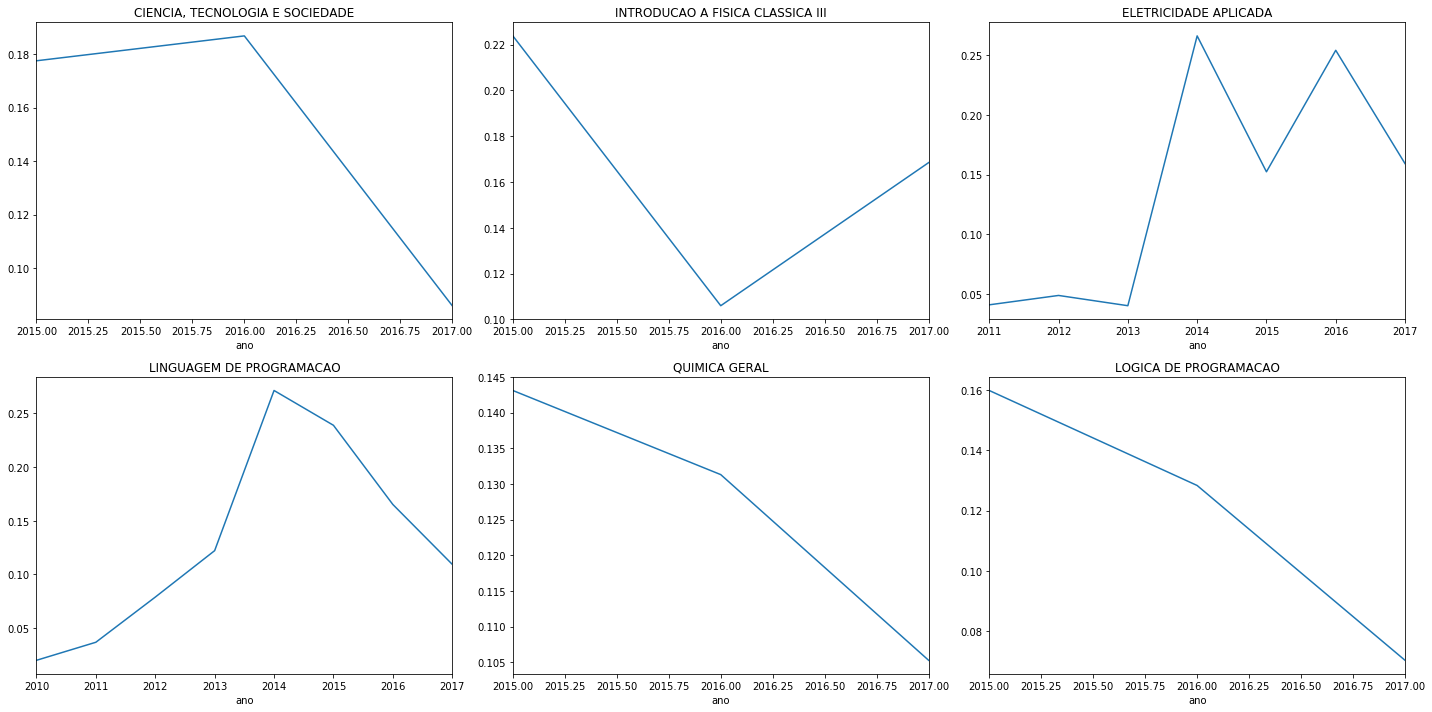

In [225]:
#y.drop(['CANCELADO','INDEFERIDO'],axis=1)
#v= y[y.TOTAL>=200][['nome_ascii','taxa_desistencia']].sort_values('taxa_desistencia',ascending=False).head(6)
cont= 1
plt.ion()
fig= plt.figure(figsize=(20,10))
for n in v.nome_ascii:
    fig.add_subplot(2,3,cont)
    cont+=1
    a= w[w.nome_ascii==n]
    a.index= a.ano
    a['taxa_desistencia'].plot()
    plt.title(n)

plt.tight_layout()
plt.savefig('taxa_desis_ano.png')
#y[y.TOTAL>=100][['nome_ascii','taxa_desistencia']].sort_values('taxa_desistencia',ascending=False).head(10)

Text(0.5,1,'CALCULO I')

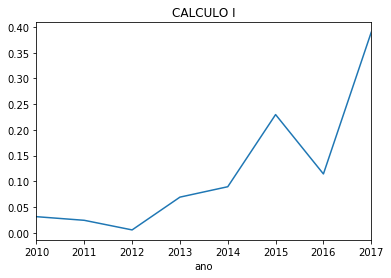

In [192]:
a= w[w.nome_ascii=='CALCULO I']
a.index= a.ano
a['taxa_desistencia'].plot()
plt.title('CALCULO I')

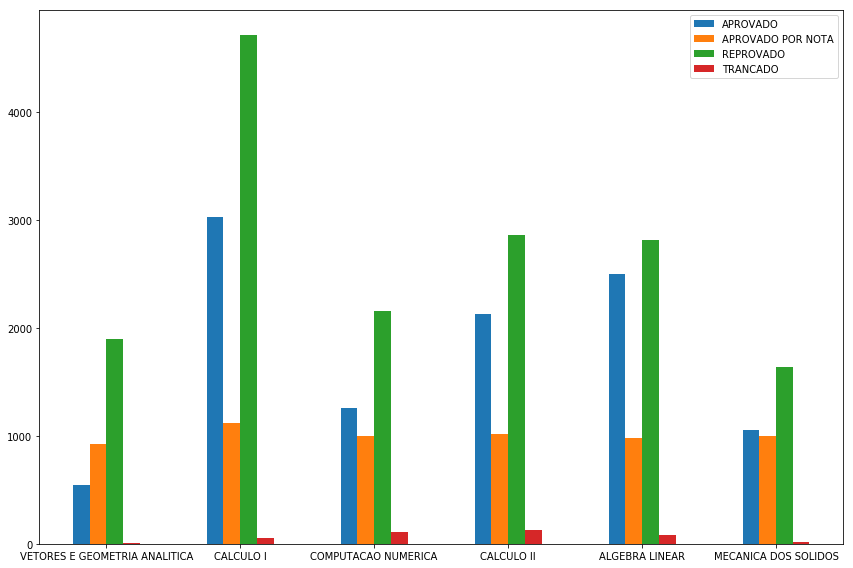

In [208]:
y.index= y['nome_ascii'].values
#plt.figure(figsize=(20,20))
y[y.TOTAL>200].sort_values('taxa_aprovacao',ascending=True)[['APROVADO','APROVADO POR NOTA','REPROVADO','TRANCADO']][:6].plot(kind='bar',stacked=False, rot=0, figsize=(12,8))
plt.tight_layout()
plt.savefig('taxa_aprovacao')